# Plotting the shape functions of the T6 triangle

We use Richard Shewchuk's two-dimensional quality mesh generator to triangulate the master cell of the T6 triangle, then we plot the shape functions with Matplotlib.

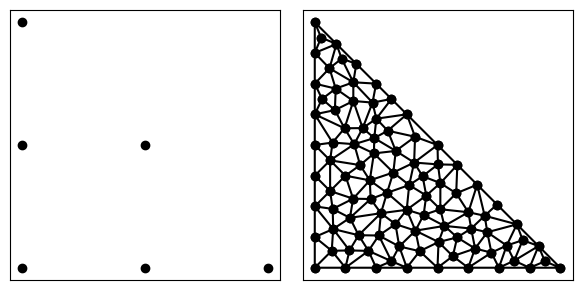

In [1]:
import matplotlib.pyplot as plt
import triangle as tr

from sigmaepsilon.mesh.cells import T6

# get the coordinates of the master cell
mc = T6.Geometry.master_coordinates()

# triangulate the master cell and plot with the `triangle` library
data = dict(vertices=mc)
triangulation = tr.triangulate(data, 'qa0.005')
tr.compare(plt, data, triangulation)
plt.show()

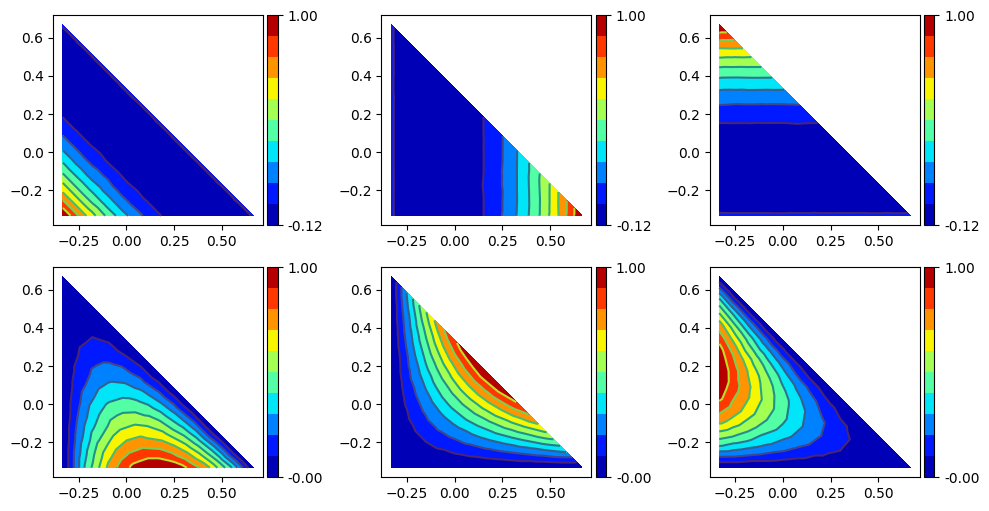

In [2]:
from sigmaepsilon.mesh.plotting import triplot_mpl_data
from sigmaepsilon.mesh import triangulate

# get the triangulation as a `matplotlib` triangulation object
*_, triobj = triangulate(points=triangulation["vertices"], triangles=triangulation["triangles"])

# evaluate shape functions at the vertices of the triangulation
values = T6.Geometry.shape_function_values(triangulation["vertices"])

# plot the values
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 6))
for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5, ax6]):
    _ = triplot_mpl_data(triobj, fig=fig, ax=ax, data=values[:, i], nlevels=10)